# Predicting the Loan approved or not using exploratory data

## 1. Business Problem
   * Banks face financial losses when customers default on loans. 
   * The objective of this project is to build a machine learning model that predicts whether a customer is likely to default.

## 2. Objective
- Identify high-risk applicants
- Reduce financial loss
- Improve loan approval decision-making


## 3. Business Impact
- False Negative (predicting non-default when actually default) → High financial loss
- False Positive (predicting default when actually safe) → Lost customer opportunity

## 2. Data:
The data is downloaded from Kaggle : https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc

## 3. Data Cleaning :
   * We need to change the data types of certain variables to factor vector
   * Check for missing data, duplicate records and remove insignificant variables

## 4. Features:
   * File contains 14 columns and 5000 rows. Description of the columns are as follows:

   * ID: Customer ID
   * Age : Customer Age
   * Experience : Customer Experience
   * Income : Income of the Customer
   * ZipCode: Customer's residence zipcode
   * Family : No of Family members of the customer
   * CCAvg: Credit Card Average Score
   * Education: Education of the customer
   * Mortgage: Mortgage taken or not taken by the customer
   * Personal Loan: 0 = No personal loan given , 1 = personal loan given
   * Securities Account : Having or not having a Securities Account
   * CD Account : Having or not having a CD Account
   * Online : Having or not having online banking
   * Credit Card : Having or not having a credit card

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Data Loading

In [2]:
# Import the data 
df = pd.read_csv("bankloan.csv")
df.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
ZIP.Code,91107.0,90089.0,94720.0,94112.0,91330.0
Family,4.0,3.0,1.0,1.0,4.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Education,1.0,1.0,1.0,2.0,2.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal.Loan,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

## EDA

In this section, we:
- Understand feature distributions
- Identify class imbalance
- Analyze relationships between variables

In [5]:
df["Income_Group"] = pd.cut(
    df["Income"],
    bins=[0, 40, 80, 120, 200],
    labels=['Low', 'Medium', 'High', 'Very High']
)

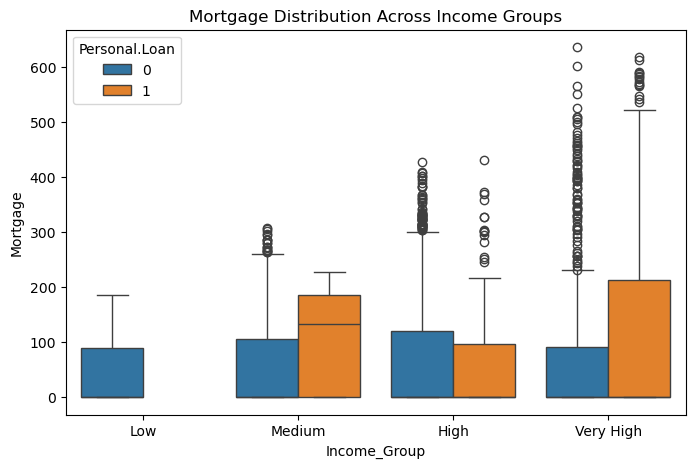

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Income_Group', y='Mortgage', hue='Personal.Loan', data=df)

plt.title("Mortgage Distribution Across Income Groups")
plt.show()

 **This gives that Mortgage increases as Income increases**

* In Low income, mortgage values are mostly low.

* In Very High income, mortgage values are much higher.

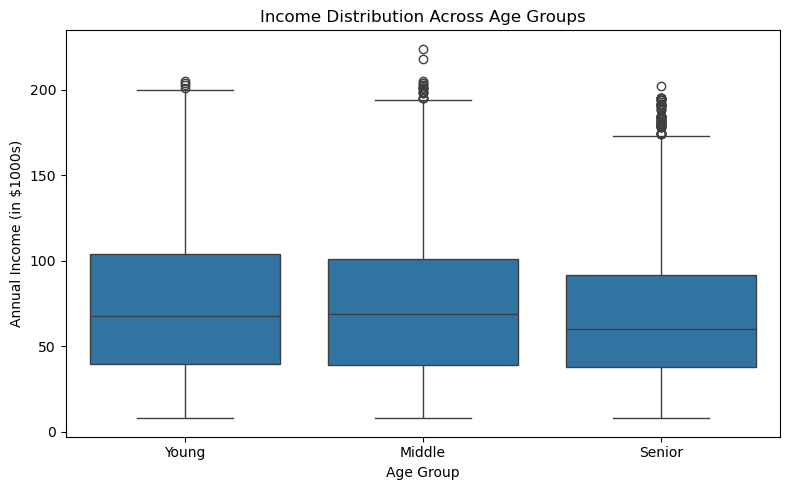

In [7]:
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[20, 35, 50, 65],
    labels=['Young', 'Middle', 'Senior']
)

plt.figure(figsize=(8, 5))
sns.boxplot(x="Age_Group", y="Income", data=df)

plt.title("Income Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Annual Income (in $1000s)")
plt.tight_layout()
plt.show()

**Note**
1. Income varies significantly within each age group.
2. The boxes overlap heavily, so Age alone may not be the strong predictor of income in this dataset.

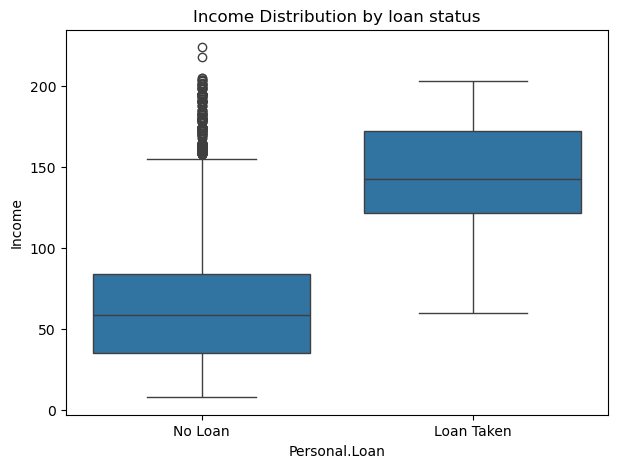

In [8]:
# Compare Income Distribution Based on Loan Approval

plt.figure(figsize=(7, 5))
sns.boxplot(x="Personal.Loan",  y="Income", data=df)

plt.title("Income Distribution by loan status")
plt.xticks([0,1],['No Loan', 'Loan Taken'])
plt.show()

In [9]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Age,25,45,39,35,35
Experience,1,19,15,9,8
Income,49,34,11,100,45
ZIP.Code,91107,90089,94720,94112,91330
Family,4,3,1,1,4
CCAvg,1.6,1.5,1.0,2.7,1.0
Education,1,1,1,2,2
Mortgage,0,0,0,0,0
Personal.Loan,0,0,0,0,0


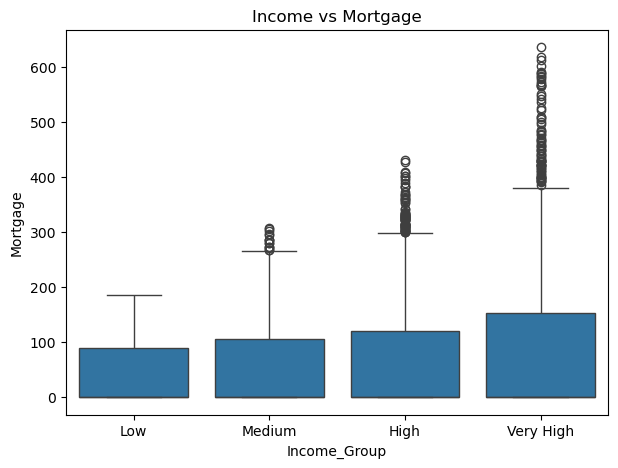

In [10]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="Income_Group", y="Mortgage", data=df)

plt.title("Income vs Mortgage")
plt.show()

In [11]:
df ['Education'] = df['Education'].map({
    1: 'UnderGraduate',
    2: 'Graduate',
    3: 'Advanced'
})

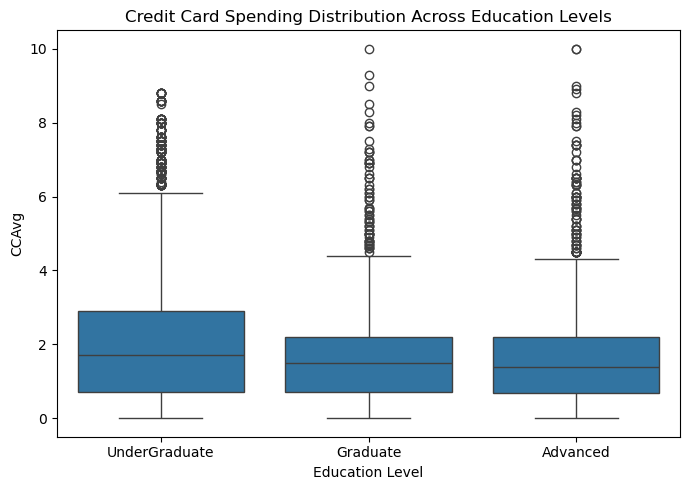

In [12]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Education', y='CCAvg', data = df)

plt.title("Credit Card Spending Distribution Across Education Levels")
plt.xlabel('Education Level')
plt.ylabel("CCAvg")
plt.tight_layout()
plt.show()

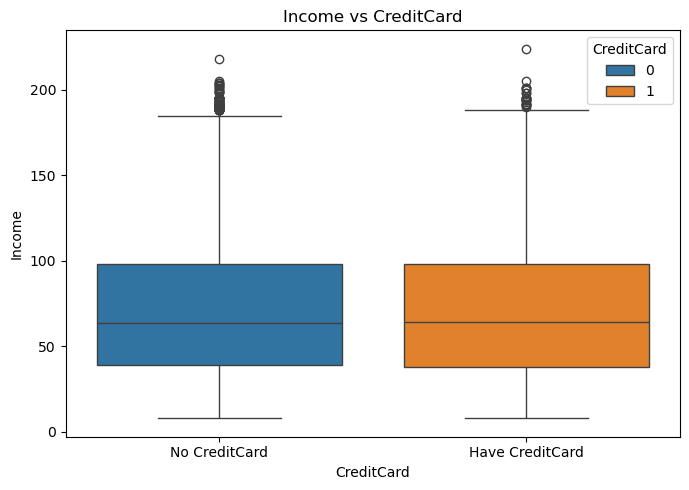

In [13]:
# Income vs CreditCard
plt.figure(figsize=(7, 5))
sns.boxplot(x="CreditCard", y="Income", hue='CreditCard', data=df)

plt.title("Income vs CreditCard")
plt.xticks([0,1], ['No CreditCard', 'Have CreditCard'])
plt.tight_layout()
plt.show()

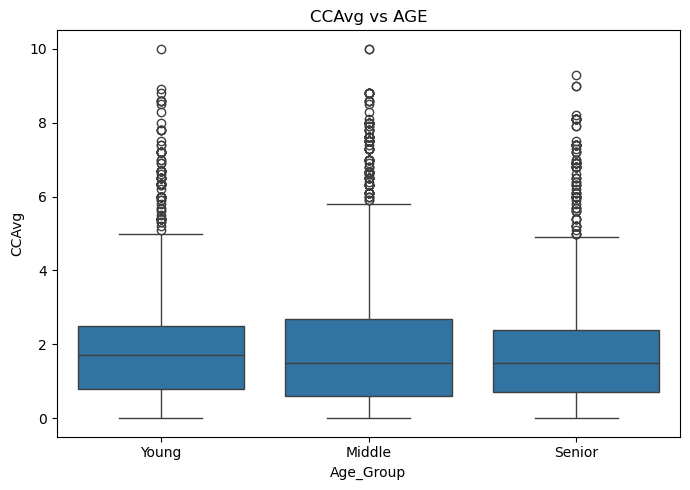

In [14]:
# CCAvg vs Age
plt.figure(figsize=(7, 5))
sns.boxplot(x='Age_Group', y='CCAvg', data=df)

plt.title("CCAvg vs AGE")
plt.tight_layout()
plt.show()

## Data Preprocessing

Steps performed:
- Handling missing values
- Encoding categorical variables
- Feature scaling using StandardScaler
- Train-Test split (80-20)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler

In [16]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Age,25,45,39,35,35
Experience,1,19,15,9,8
Income,49,34,11,100,45
ZIP.Code,91107,90089,94720,94112,91330
Family,4,3,1,1,4
CCAvg,1.6,1.5,1.0,2.7,1.0
Education,UnderGraduate,UnderGraduate,UnderGraduate,Graduate,Graduate
Mortgage,0,0,0,0,0
Personal.Loan,0,0,0,0,0


In [18]:
X.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard',
       'Income_Group', 'Age_Group'],
      dtype='str')

In [19]:
X.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                   int64
CCAvg                  float64
Education                  str
Mortgage                 int64
Securities.Account       int64
CD.Account               int64
Online                   int64
CreditCard               int64
Income_Group          category
Age_Group             category
dtype: object

In [21]:
X = pd.get_dummies(X, drop_first=True)

## Model Building

We trained and compared the following models:

- Logistic Regression
- Random Forest Classifier

Evaluation Metrics:
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
from sklearn.metrics import accuracy_score

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: dict of model name and model object
    """
    model_scores = {}

    for name, model in models.items():
        # Fit model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate accuracy
        model_scores[name] = accuracy_score(y_test, y_pred)

    return model_scores


In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

model_scores = fit_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test)

In [27]:
model_scores

{'Logistic Regression': 0.974, 'Random Forest': 0.992}

In [50]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.974,0.943820,0.800000,0.865979
1,Random Forest,0.992,0.989899,0.933333,0.960784


In [29]:
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [30]:
y_preds= rf.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.99      0.90      0.94       105

    accuracy                           0.99      1000
   macro avg       0.99      0.95      0.97      1000
weighted avg       0.99      0.99      0.99      1000



## Model Evaluation

The models were evaluated using:

- Confusion Matrix
- Classification Report
- ROC Curve
- AUC Score

Special focus was given to Recall to minimize financial risk.


In [39]:
# Comparing both Logistic Regression and Random Forest
for name, model in models.items():
    print(f"Model: {name}")
    print(classification_report(y_test, model.predict(X_test_scaled)))
    print("-"*40)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       895
           1       0.94      0.80      0.87       105

    accuracy                           0.97      1000
   macro avg       0.96      0.90      0.93      1000
weighted avg       0.97      0.97      0.97      1000

----------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       895
           1       0.99      0.93      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000

----------------------------------------


## ROC Curve

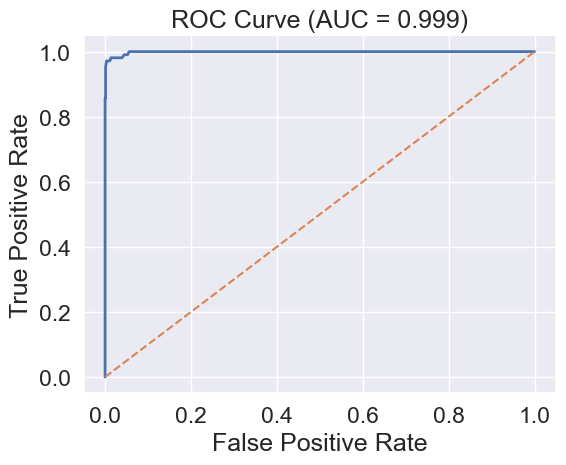

AUC Score: 0.9988


In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")

plt.tight_layout()
plt.show()

print(f"AUC Score: {roc_auc:.4f}")


In [33]:
# For AUC Curve Seperately
from sklearn.metrics import roc_auc_score
y_probs = rf.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score", auc_score)

AUC Score 0.9990529396115988


## Confusion Metrics

In [34]:
print(confusion_matrix(y_test, y_preds))

[[894   1]
 [ 11  94]]


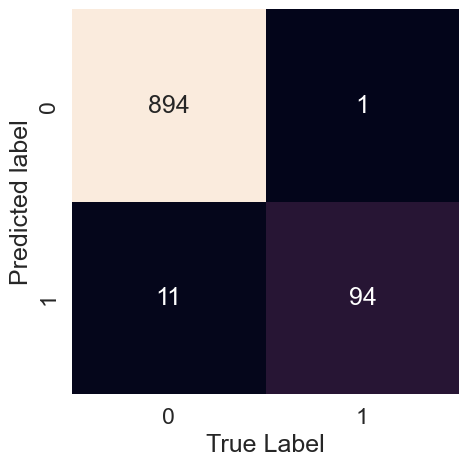

In [36]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice Confusion matrix using seaborn
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    fmt="d",
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)    

## Feature Importance Analysis

Feature importance helps us understand 
which variables influence loan default the most.

This improves model interpretability 
and provides business insights.


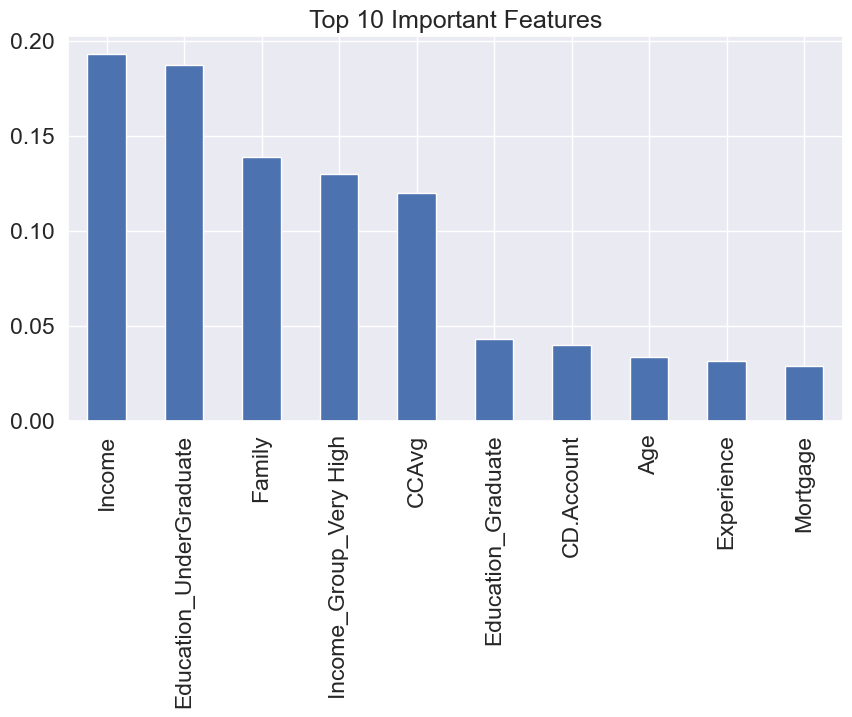

In [51]:
feature_importance = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,5))
feature_importance.head(10).plot(kind="bar")
plt.title("Top 10 Important Features")
plt.show()

# Conclusion

- Random Forest performed best with highest recall and F1 score.
- The model achieved ~98% accuracy.
- The model effectively identifies high-risk loan applicants.
- Feature importance analysis shows income and credit history are major drivers.

##  Future Improvements
- Hyperparameter tuning
- Cross-validation
- Deploy using Flask / Streamlit
